In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm, t
from matplotlib import pyplot as plt

**Prob.25** CEO compensation A sample of 20 CEOs from the Forbes 500 shows total annual compensations ranging from a mini- mum of $0.1 to $62.24 million. The average for these 20 CEOs is $7.946 million. Here’s a histogram:

Based on these data, a computer program found that a 95% confidence interval for the mean annual compensation of all Forbes 500 CEOs is (1.69, 14.20) $ million. Why should you be hesitant to trust this confidence interval?

**Answer:** the following reasons that I should be hesitant to truse this confidence interval:

1. the sample size is quite small;
2. the histogram has outliers and strong skewness;
3. the histogram does not meet the Nearly Normal condition.

**Prob.44** CEO compensation The total compensation of the chief
executive officers (CEOs) of the 800 largest U.S. companies (the Fortune 800) averaged (in thousands of dollars) 10,307.31 with a standard deviation (also in $1000) of 17,964.62. Here is a histogram of their annual compensations (in $1000):

a. Describe the histogram of Total Compensation. A research organization simulated sample means by drawing samples of 30, 50, 100, and 200, with replacement, from the 800 CEOs. The histograms show the distributions of means for many samples of each size.

b. Explain how these histograms demonstrate what the Central Limit Theorem says about the sampling distribution model for sample means. Be sure to talk about shape, center, and spread.

c. Comment on the “rule of thumb” that “With a sample size of at least 30, the sampling distribution of the mean is Normal.”

In [2]:
datafile = '../../dataset/ch05/ceo_compensation_2014.txt'
data = pd.read_csv(datafile, sep='\t')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Employer                 434 non-null    object 
 1   CEO                      434 non-null    object 
 2   CEO_Compensation         434 non-null    int64  
 3   Median_Worker_Comp       434 non-null    int64  
 4   Ratio                    434 non-null    int64  
 5   Company_Rating           434 non-null    float64
 6   CEO_Compensation_($000)  434 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 23.9+ KB


In [4]:
data.head()

,Employer,CEO,CEO_Compensation,Median_Worker_Comp,Ratio,Company_Rating,CEO_Compensation_($000)
0,CBRE,Robert E. Sulentic,6367953,63012,101,3.7,636.7953
1,MasterCard,Ajay Banga,13406041,127625,105,3.6,1340.6041
2,Universal Health Services,Alan B. Miller,18425575,50865,362,2.9,1842.5575
3,McCormick & Company,Alan D. Wilson,10259802,73512,140,3.6,1025.9802
4,Procter & Gamble,Alan George Lafley,19504353,102590,190,3.9,1950.4353


In [5]:
compensation = data['CEO_Compensation_($000)']

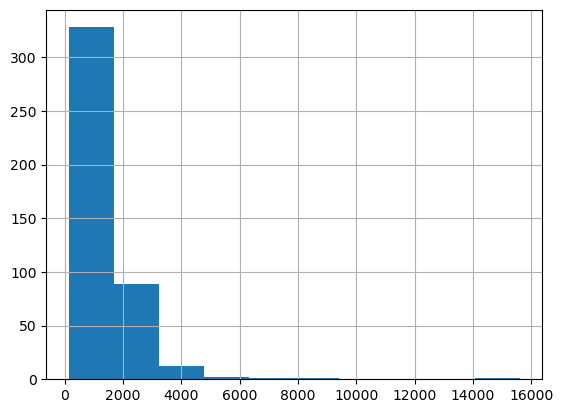

In [6]:
compensation.hist();

In [7]:
samples = []
for i in range(1000):
    samples.append(compensation.sample(n=30))

In [8]:
sample_means = pd.DataFrame([s.mean() for s in samples])

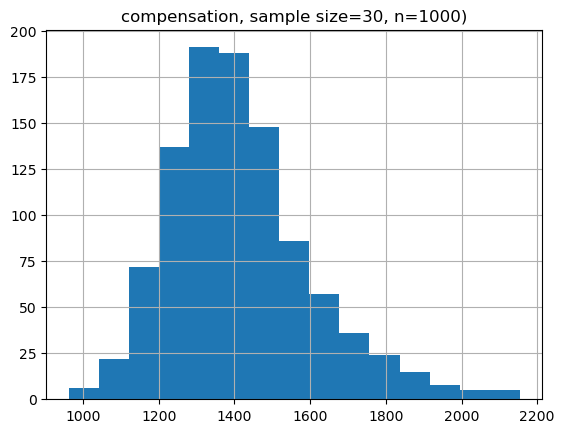

In [9]:
sample_means.hist(bins=15);
plt.title('compensation, sample size=30, n=1000)');

In [10]:
samples = []
for i in range(1000):
    samples.append(compensation.sample(n=50))

In [11]:
sample_means = pd.DataFrame([s.mean() for s in samples])

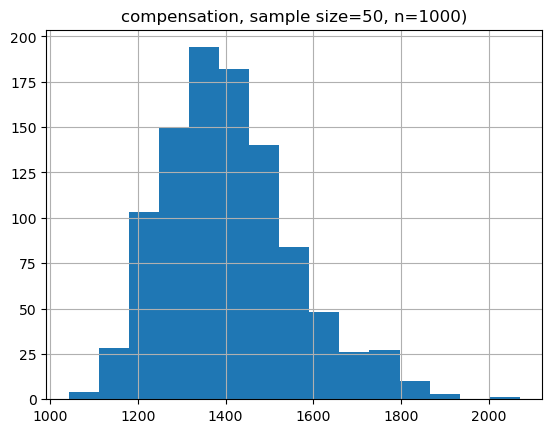

In [12]:
sample_means.hist(bins=15);
plt.title('compensation, sample size=50, n=1000)');

In [13]:
samples = []
for i in range(1000):
    samples.append(compensation.sample(n=100))

In [14]:
sample_means = pd.DataFrame([s.mean() for s in samples])

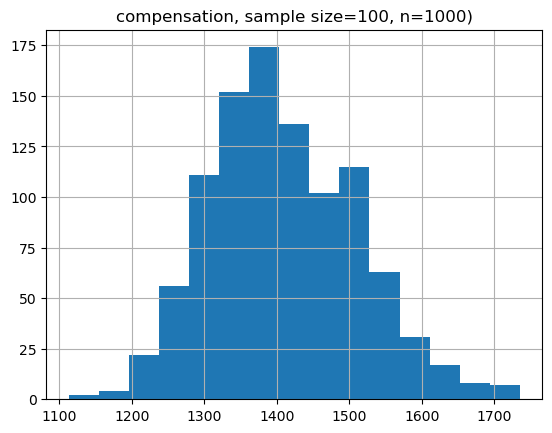

In [15]:
sample_means.hist(bins=15);
plt.title('compensation, sample size=100, n=1000)');

In [16]:
samples = []
for i in range(1000):
    samples.append(compensation.sample(n=200))

In [17]:
sample_means = pd.DataFrame([s.mean() for s in samples])

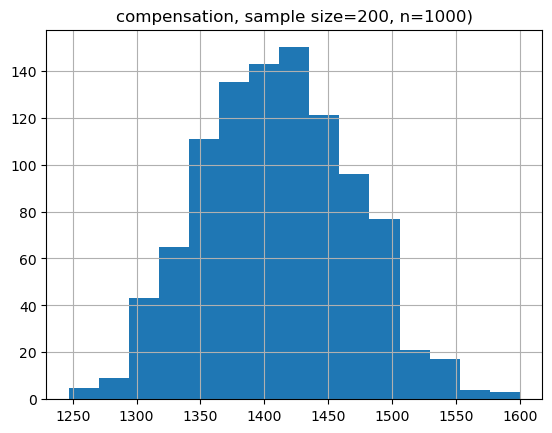

In [18]:
sample_means.hist(bins=15);
plt.title('compensation, sample size=200, n=1000)');

**Answer to (a)** The histogram of Total Compensation is unimodal, right skewed and with obvious outliers.  

**Answer to (b)** 

(1) samples of size 30: Shape: this histogram is unimodal, right skewed and with outliers. Its certer at 8,000 to 10,000.

(2) sample of size 50: Shape: this histogram is unimodal and right skewed. Its center at 7,000 to 10,000. 

(3) sample of size 100: Shape: this histogram is unimodal and right skewed and with outliers.  Its centert at 9,000 to 12,000.

(4) sample of size 200: Shape: this histogram is unimodal, symmetric and right skewed.  Its center at round 10,000.

**Answer to (c)** The sample size of 30 may still a small sample size, and the sampling distribution of the mean is unimodal but not symmetric.

**Prob.46** pensation for 800 CEOs, for which the true mean and standard
deviation were (in thousands of dollars) 10,307.31 and 17,964.62, respectively. A simulation drew samples of sizes 30, 50, 100, and 200 (with replacement) from the total annual compensations of the Fortune 800 CEOs. The summary statistics for these simula- tions were as follows:

a) According to the Central Limit Theorem, what should the theoretical mean and standard deviation be for each of these sample sizes?

b) How close are the theoretical values to what was observed from the simulation?

**Answer to (a)** 

sample size = 30: the mean is the less close to the population mean compare to the other three sample sizes.  The standard deviation is approximate $\sqrt{\frac{1}{30}}$ of the population standard deviation.

sample size = 50: the mean is more close to the population mean compare to the sample size of 30.  The standard deviation is $\sqrt{\frac{1}{50}}$ of the population standard deviation.

sample size = 100: the mean is the closest to the polulation mean, and the standard deviation is approximate 1/10 of the population value of the population standard deviation. The sample size of 100 may be the best option to choose.

sample size = 200: the mean is more close to the population mean compare to the sample size of 30 and the sample size of 50.  The standard deviation is approximate $\sqrt{\frac{1}{200}}$ of the population standard deviation.

**Answer to (b)** The mean of the sample size of 100 is the closest to the population mean, and the second is the sample size of 200, then the third is the sample size of 50 and the mean of the sample size of 30 is the less close to the population mean.

The standard deviation of sample size 30 is approximate $\sqrt{\frac{1}{30}}$ of the population standard deviation.  The standard deviation of sample size 50 is $\sqrt{\frac{1}{50}}$ of the population standard deviation.  The standard deviation of sample size is 1/10 of the population standard deviation. The standard deviation of sample size is $\sqrt{\frac{1}{200}}$ of the population standard deviation.